# 네이버 금융
- selenium 
- iframe 
    - HTML 안에 또다른 HTML 

In [ ]:
import pandas as pd 
import time 
from selenium import webdriver 

In [ ]:
url = "https://finance.naver.com/marketindex/" 
driver = webdriver.Chrome()
driver.get(url)

In [ ]:
# 환전 고시율
elements = driver.find_elements_by_css_selector("ul#exchangeList > li > a")
elements[0].find_element_by_css_selector("div.head_info > span.value").text, len(elements)

('1,184.00', 8)

In [ ]:
# 주요뉴스 
elements = driver.find_elements_by_css_selector("#content  ul > li")
elements[9].find_element_by_css_selector("p > a").text, len(elements)

('[외환마감]强달러에 환율 장중 1180원', 15)

In [ ]:
# 아래 쪽 환율 데이터 
elements = driver.find_elements_by_css_selector("tbody > tr")
elements[0].text
# elements[0].find_element_by_css_selector("div.head_info > span.value").text

'CD금리(91일) 1.01 0.00'

In [ ]:
# 아래 쪽 환율 데이터 
elements = driver.find_elements_by_css_selector("body > div > table > tbody > tr:nth-child(1) > td.tit > a")
elements

[]

In [ ]:
# iframe 태그 지정 
iframe = driver.find_element_by_css_selector("#frame_ex1")
# iframe 태그 이동 
driver.switch_to_frame(iframe)

<ipython-input-153-1435f4d98860>:4: DeprecationWarning: use driver.switch_to.frame instead
  driver.switch_to_frame(iframe)


In [ ]:
elements = driver.find_elements_by_css_selector("body > div > table > tbody > tr:nth-child(1) > td.tit > a")
elements[0].text

'미국 USD'

In [ ]:
elements = driver.find_elements_by_css_selector("tbody > tr")
elements[0].find_element_by_css_selector("td.sale").text

'1,184.00'

In [ ]:
datas = [] 

for element in elements:
    link = element.find_element_by_css_selector("td.tit > a").get_attribute("href")
    name = element.find_element_by_css_selector("td.tit > a").text
    sale = element.find_element_by_css_selector("td.sale").text
    datas.append({
        "name": name, 
        "sale": sale,  
        "link": link
    })
driver.quit()
df = pd.DataFrame(datas)
df.to_excel("./seleniumNaverFinance.xlsx", encoding="utf-8")
df.tail(2)

In [ ]:
def naver_finance():
    url = "https://finance.naver.com/marketindex/" 
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(2)
    # iframe 태그 지정 
    iframe = driver.find_element_by_css_selector("#frame_ex1")
    # iframe 태그 이동 
    driver.switch_to_frame(iframe)
    time.sleep(2)

    datas = [] 

    for element in elements[:5]:
        try: 
            link = element.find_element_by_css_selector("td.tit > a").get_attribute("href")
            name = element.find_element_by_css_selector("td.tit > a").text
            sale = element.find_element_by_css_selector("td.sale").text
            datas.append({
                "name": name, 
                "sale": sale,  
                "link": link
            })
            time.sleep(2)
        except Exception as e:
            print(e)
            driver.quit()
    driver.quit()
    return pd.DataFrame(datas)

In [ ]:
naver_finance()

# 사람 처럼 행동하지 않으면.. 

In [ ]:
from PIL import Image as pil

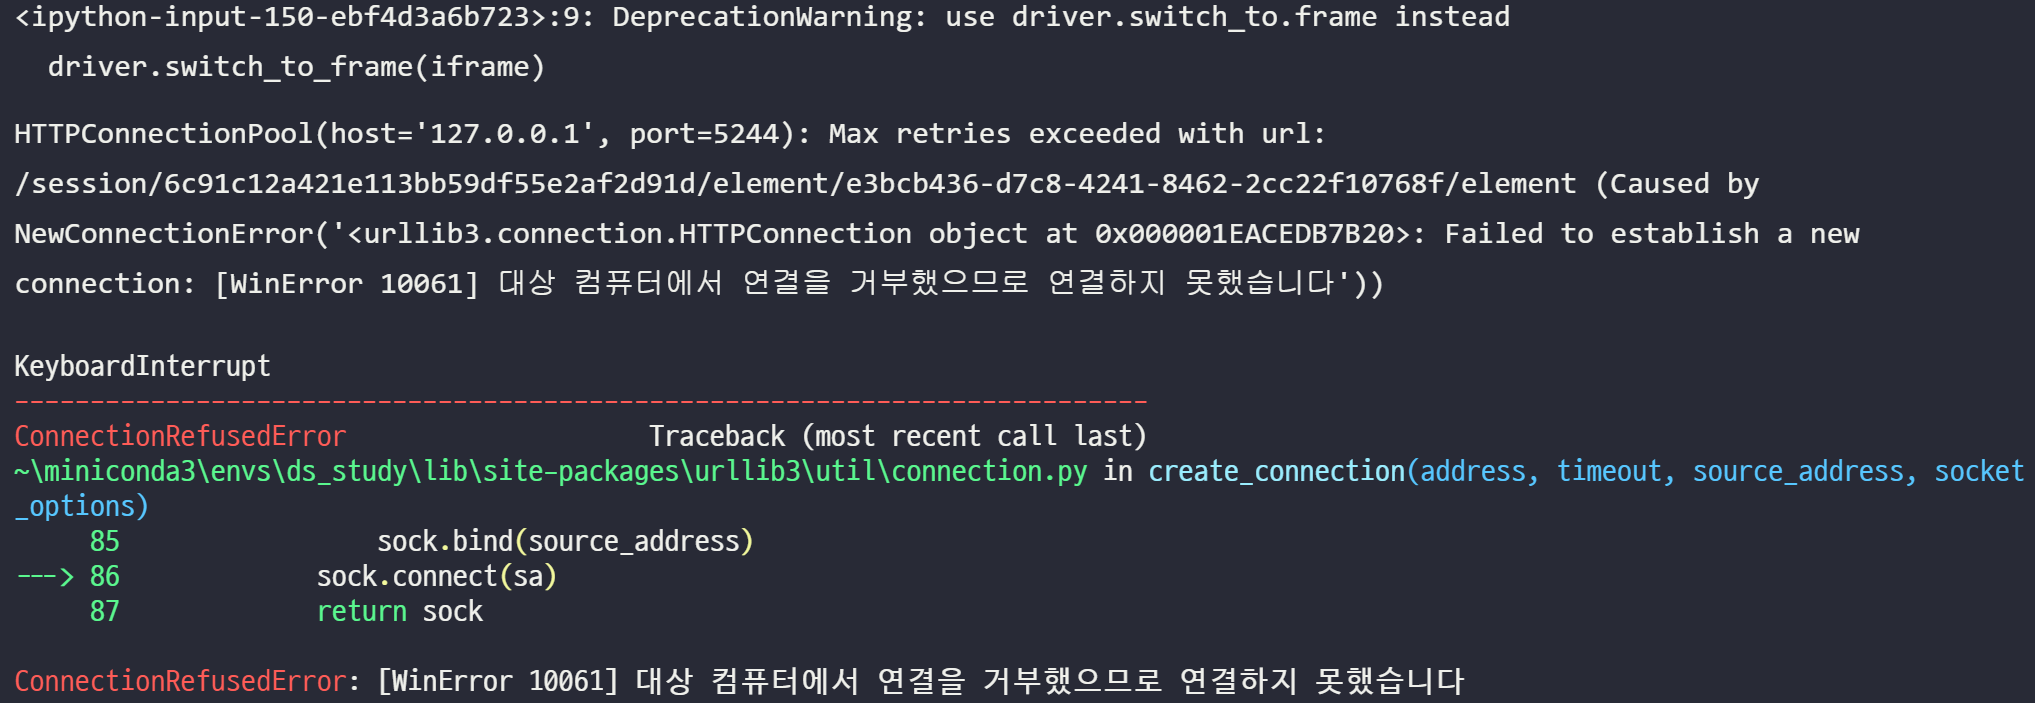

In [ ]:
img = pil.open("./error.png")
img